<a href="https://colab.research.google.com/github/Aggie2024/Prediction-of-Product-Sales/blob/main/Product_Sales_Feature_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales - Feature Inspection
- Author: Agnes Nansubuga

Continuing with the sales prediction for food items sold at various stores, this notebook covers the feature inspection to prepare for the data for modelling.

In [3]:
# Importing required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Save the filepath as a variable "fpath"
fpath =  "/content/drive/MyDrive/CodingDojo/Project_SalesPrediction/sales_predictions_EDA.csv"
# Read in the file and display the data
df = pd.read_csv(fpath)
# preview of the data
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Dropping unnamed 0 (permanently)
df = df.drop(columns=['Unnamed: 0'])
# summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_Maximum_Retail_Price  8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Replacing placeholders with null values.
In order to model our data well, we remove any placeholders previously added in week 2 and replace them with null values.
- We had replaced 1463 missing values in the Item_Weight column with '999'.
- We had replaced 2410 missing values in the Outlet_Size column with 'Missing'.

In [7]:
# checking the Outlet_Size column
df['Outlet_Size'].value_counts()

Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: count, dtype: int64

In [8]:
# Replace Missing with null Nan for ML
df['Outlet_Size'] = df['Outlet_Size'].replace('Missing', np.nan)
# Check value counts
df['Outlet_Size'].value_counts(dropna=False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

In [9]:
# checking the Item_Weight column
df['Item_Weight'].value_counts()

Item_Weight
999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: count, Length: 416, dtype: int64

In [10]:
# Replace 999 with null Nan for ML
df['Item_Weight'] = df['Item_Weight'].replace(999, np.nan)
# Check value counts
df['Item_Weight'].value_counts(dropna=False)

Item_Weight
NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: count, Length: 416, dtype: int64

### Create a flexible function to explore categorical features

In [23]:
# function to explore categorical features
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.tick_params(axis='x', labelrotation=45)
  #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

### Exploring the relationship between a categorical feature and the target

In [24]:
# Function for the categorical feature and the target
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

  # Create a Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Create a Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.tick_params(axis='x', labelrotation=45)
  #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a figure title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

### Create a flexible function to explore numeric features.

In [69]:
# function to explore numeric features
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

### Exploring the relationship between a numeric feature and the target

In [14]:
# Function for the numeric feature and the target
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  # Include a flexi-argument within the sns.regplot function
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
  # Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

## Inspecting the different features

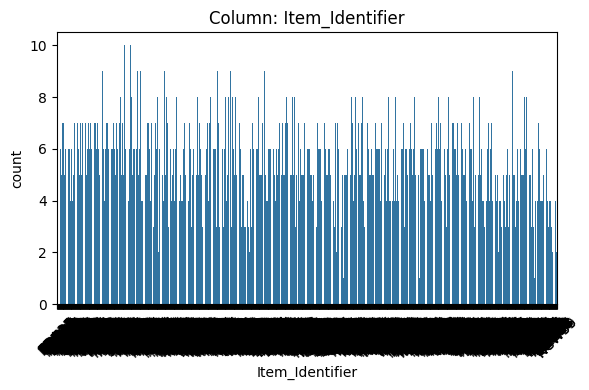

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [25]:
# Checking Item_Identifier
explore_categorical(df, "Item_Identifier");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (nominal) data
- How many null values? What percentage? What would you do with the null values
 - Item_Identifier has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess high cardinality with 1559 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - We shall exclude this from our modelling because it seems to be an internal coding system and will not have an effect on the target. It also has too many unique catergories.

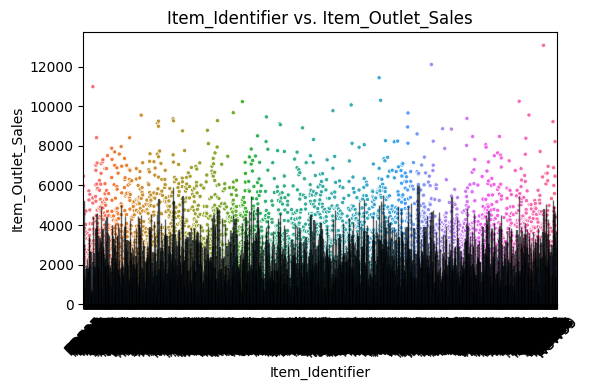

In [26]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Item_Identifier')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No this would not be a predictor.
- Does this feature appear to be a predictor of the target?
 - No, it seems to be an internal coding system.

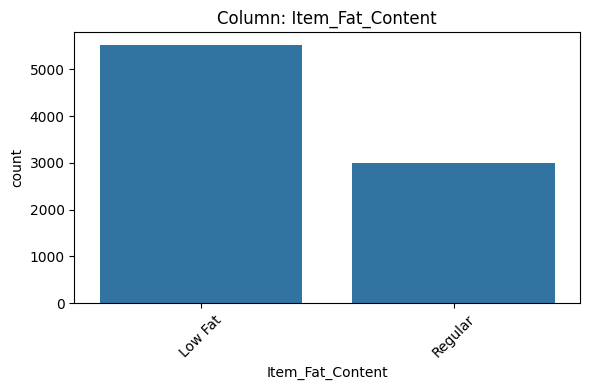

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [27]:
# Checking Item_Fat_Content
explore_categorical(df, "Item_Fat_Content");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (nominal) data
- How many null values? What percentage? What would you do with the null values
 - Item_Fat_Content has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess low cardinality with 2 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - No

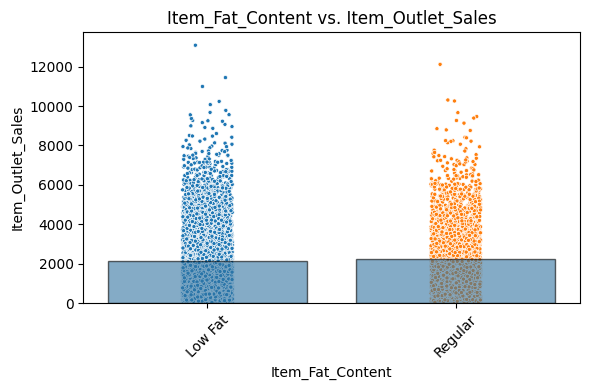

In [28]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Item_Fat_Content')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes because dietary considerations are in fashion.
- Does this feature appear to be a predictor of the target?
 - No, there does not seem to be difference between the item categories.

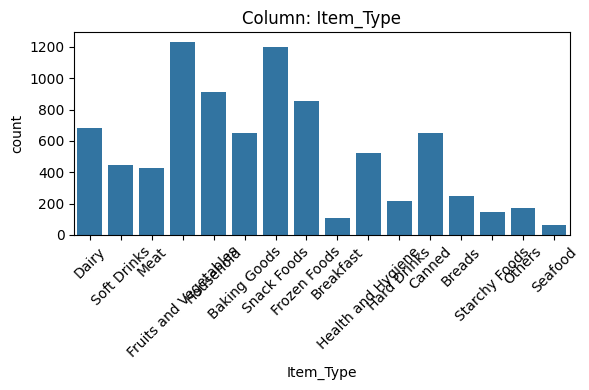

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [29]:
# Checking Item_Type
explore_categorical(df, "Item_Type");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (nominal) data
- How many null values? What percentage? What would you do with the null values
 - Item_Type has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess high cardinality with 16 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - No

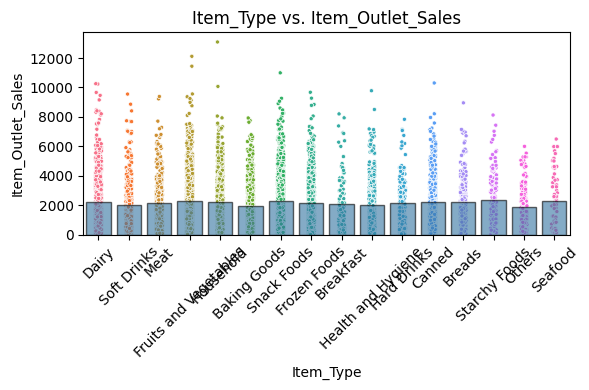

In [30]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Item_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes
- Does this feature appear to be a predictor of the target?
 - Yes, some catergories have lower sales than others.

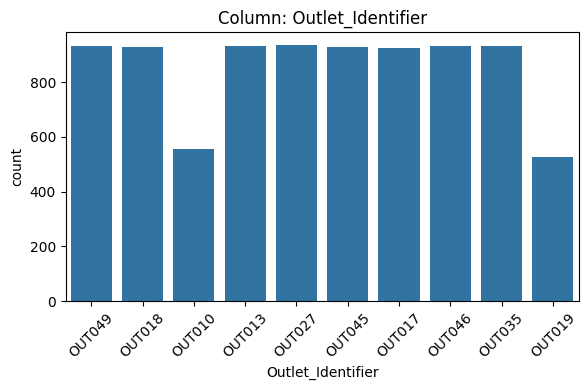

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [31]:
# Checking Outlet_Identifier
explore_categorical(df, "Outlet_Identifier");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (nominal) data
- How many null values? What percentage? What would you do with the null values
 - Outlet_Identifier has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess low cardinality with 10 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, this seems to be an internal coding to track outlets and not based on sales.

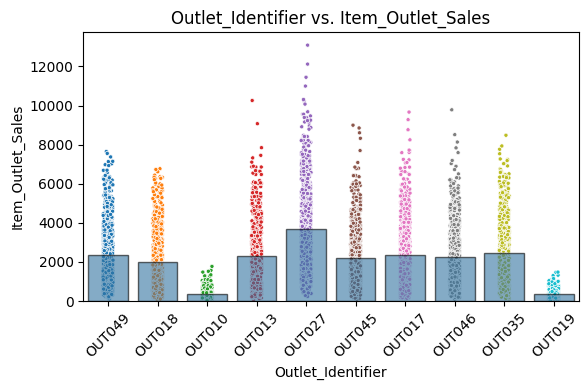

In [32]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Outlet_Identifier')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No this would not be a predictor.
- Does this feature appear to be a predictor of the target?
 - Yes, some outlets have very low sales and others high sales.

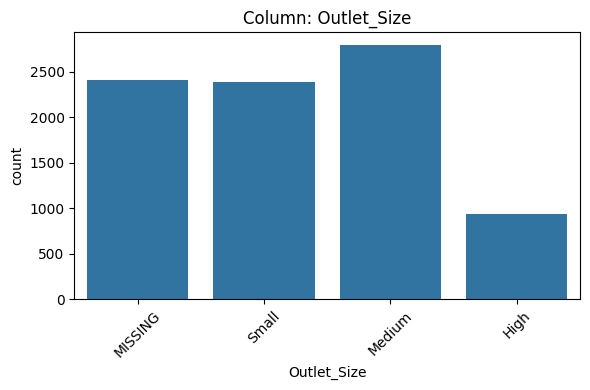

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [35]:
# Checking Outlet_Size with order
size_order = ['MISSING','Small','Medium','High']
# Use the order argument in our function
explore_categorical(df, "Outlet_Size",  order=size_order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (ordinal) data
- How many null values? What percentage? What would you do with the null values
 - Outlet size has 2410 null values (28.28%)
 - Might delete the feature as there are other features that could closely relate this data eg the outlet_type.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess low cardinality with 4 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - We might exclude it as other columns could provide data close to this column such as location and outlet type.

Compare Outlet_Size and Outlet_Type

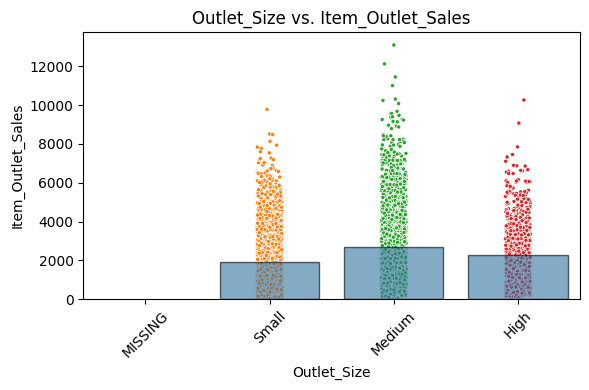

In [36]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Outlet_Size', fillna=False,
                                  order=size_order)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, outlet size could determine sales
- Does this feature appear to be a predictor of the target?
 - Maybe, there is not significant change between the different sizes.

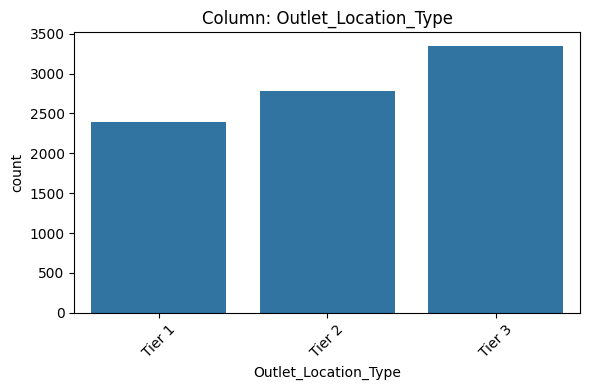

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [41]:
# Checking Outlet_Location_Type with order
location_order = ['Tier 1','Tier 2','Tier 3']
# Use the order argument in our function
explore_categorical(df, "Outlet_Location_Type",  order=location_order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (ordinal) data
- How many null values? What percentage? What would you do with the null values
 - Outlet location type has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess low cardinality with 3 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - No

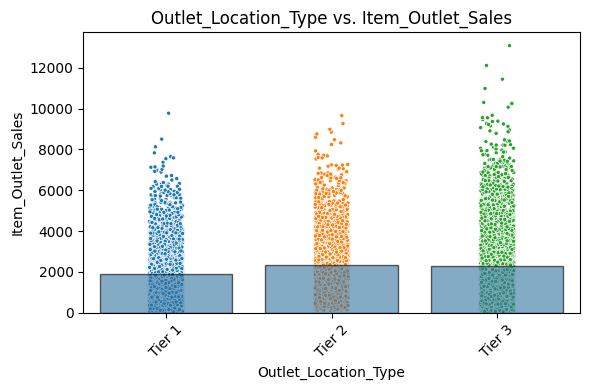

In [42]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Outlet_Location_Type',
                                  order=location_order)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, this feature is an ordinal category and different tiers have different sales potential.
- Does this feature appear to be a predictor of the target?
 -  Yes, each type seems to have different levels of sales.

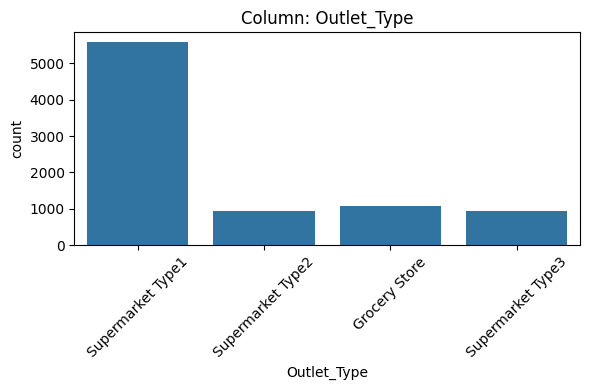

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [39]:
# Checking Outlet_Type
explore_categorical(df, "Outlet_Type");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical (nominal) data
- How many null values? What percentage? What would you do with the null values
 - Outlet_Type has no null values
 - No need to impute.
- Is the feature constant or quasi-constant?
 - It is not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
 - Possess low cardinality with 4 unique values.
- Would we know this feature before the target is determined?
 - Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - No

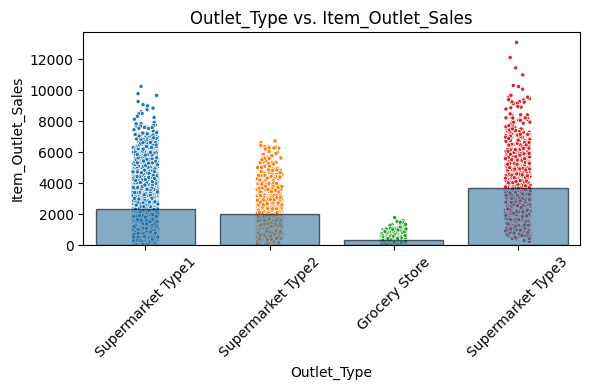

In [56]:
# Checking feature against the target
fig, ax = plot_categorical_vs_target(df, x='Outlet_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, this is a categorisation of the outlets and sales is probably a factor for this categorisation.
- Does this feature appear to be a predictor of the target?
 - Yes, each type seems to have different levels of sales.

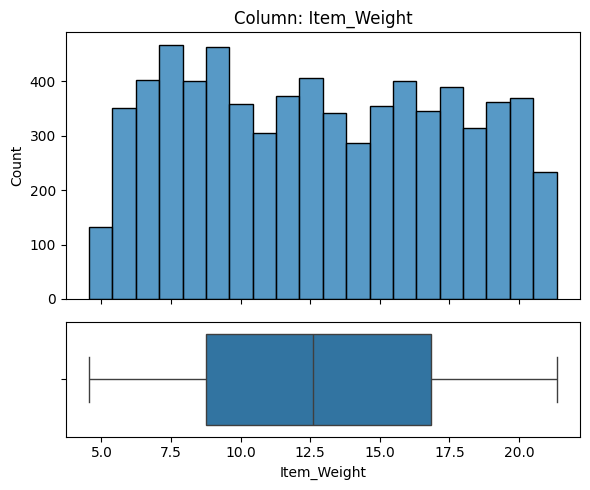

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [70]:
# Checking Item_Weight
explore_numeric(df, "Item_Weight");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 1463 nuill values (17.17%).
 - After additional exploration, the values appear to be missing at random, and I will impute them with the mean or median.
- Is the feature constant or quasi-constant?
 - No.
- What is the cardinality? Is it high?
 - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - The feature may be a factor in determining the sale price of the items.

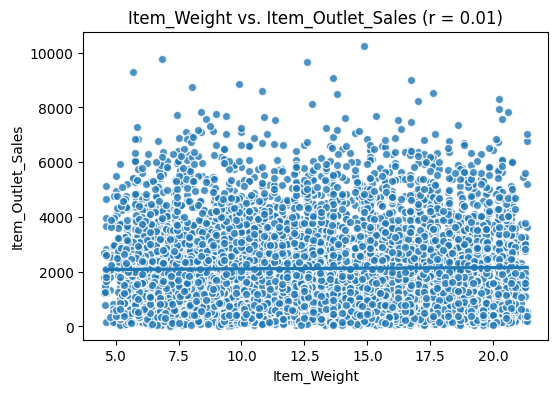

In [58]:
# Checking feature against the target
fig, ax = plot_numeric_vs_target(df, "Item_Weight")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, weight would factor into the unit cost of an item.
  - Does this feature appear to be a predictor of the target?
    - No, there is a weak relationship with the target.

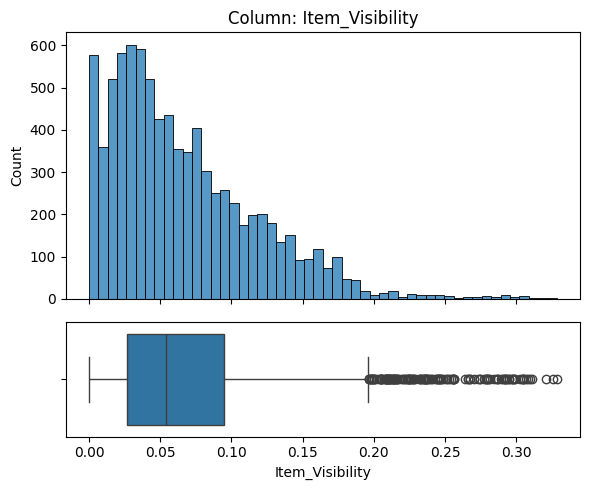

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [71]:
# Checking Item_Visibility
explore_numeric(df, "Item_Visibility");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - No nuill values.
 - No need to impute.
- Is the feature constant or quasi-constant?
 - No.
- What is the cardinality? Is it high?
 - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - The feature may be a factor in how much of the item is sold so should be part of the model.

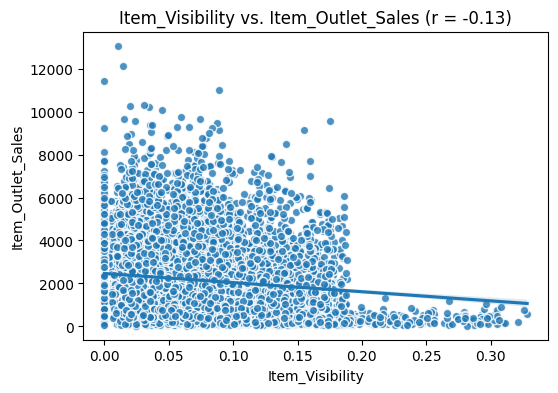

In [60]:
# Checking feature against the target
fig, ax = plot_numeric_vs_target(df, "Item_Visibility")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, item visibility would factor into the sales of an item.
  - Does this feature appear to be a predictor of the target?
    - No, there is a weak negative relationship with the target.

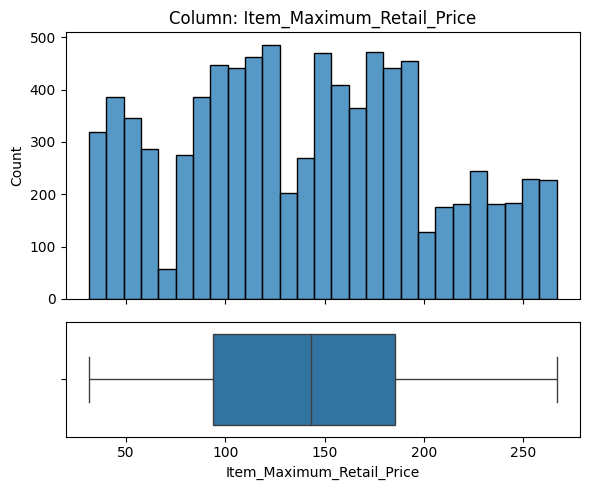

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [72]:
# Checking Item_Maximum_Retail_Price
explore_numeric(df, "Item_Maximum_Retail_Price");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - No nuill values.
 - No need to impute.
- Is the feature constant or quasi-constant?
 - No.
- What is the cardinality? Is it high?
 - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - The feature may be a factor in determining the total sale price of the items.

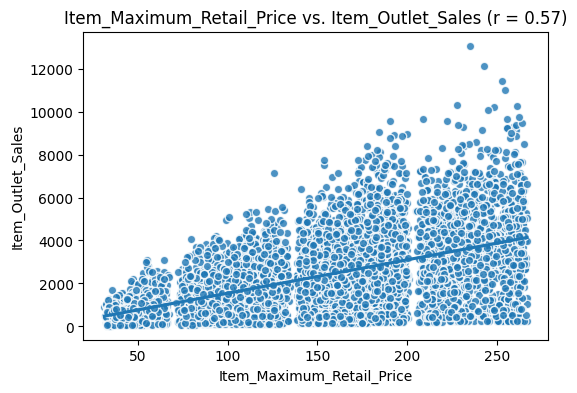

In [62]:
# Checking feature against the target
fig, ax = plot_numeric_vs_target(df, "Item_Maximum_Retail_Price")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, retail price would affect sales.
  - Does this feature appear to be a predictor of the target?
    - Yes, there is a strong positive relationship with the target.

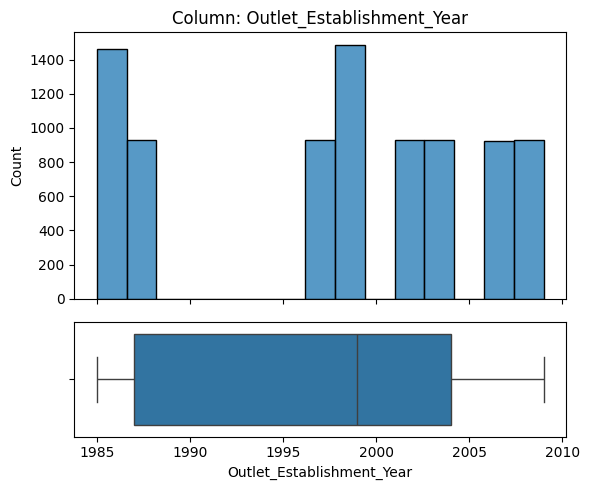

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [73]:
# Checking Outlet_Establishment_Year
explore_numeric(df, "Outlet_Establishment_Year");

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - No nuill values.
 - No need to impute.
- Is the feature constant or quasi-constant?
 - No.
- What is the cardinality? Is it high?
 - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - The feature may be a factor in how much of certain items are bought and the sales of the total sales of the outlet.

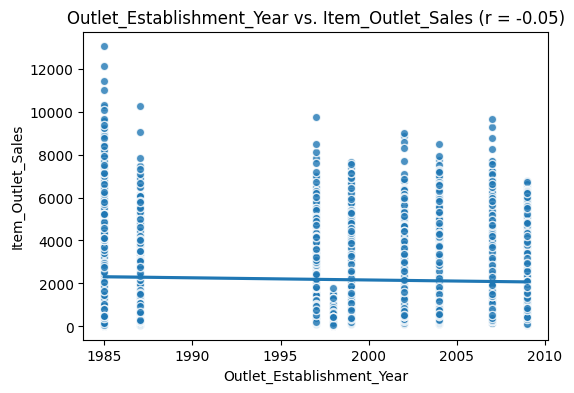

In [64]:
# Checking feature against the target
fig, ax = plot_numeric_vs_target(df, "Outlet_Establishment_Year")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, this may determine sales of different outlets.
  - Does this feature appear to be a predictor of the target?
    - No, there is a weak negative relationship with the target.

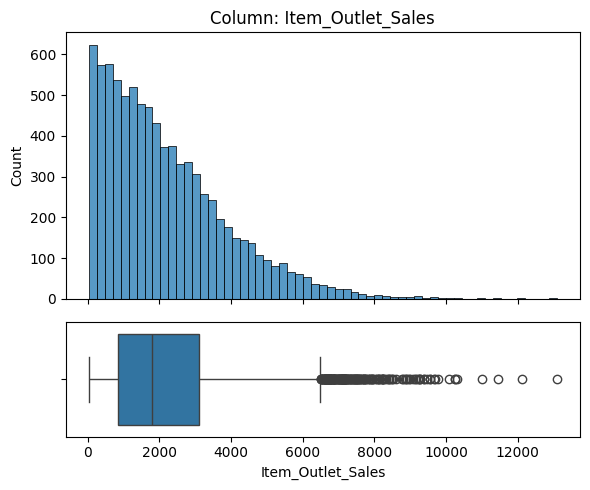

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [74]:
# Checking Item_Outlet_Sales
explore_numeric(df, "Item_Outlet_Sales");